### Configuration

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn import datasets


### SKLearn Iris Data Loader and DataFrame Visualization

In [6]:
# Write Code !!
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### X,y data Generator...Feature and Label

In [10]:
# Write Code !!
X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Training, Test 데이타를 8:2로 비율로 섞고, random_state=42로 지정
    X_train, X_test, y_train, y_test 로 각각 할당된 값들을 torch 타입으로 변환 
    torch.FloatTensor(), torch.LongTensor 사용함

In [11]:
from sklearn.model_selection import train_test_split
# Write Code !!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#### 하이퍼파라미터 지정

In [18]:
input_size = 4
hidden_size = 56
num_classes = 3
num_epochs = 100
learning_rate = 0.01

### NeuralNetwork  Model Definition

In [48]:
class NeuralNet(nn.Module): 
    def __init__(self, input_size, hidden_size, num_classes): 
        # Write Code !!
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
       # Write Code !!
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
    
        return out 

### NeuralNetwork  Model Excution , loss, optimizer, backward ..
    Forward Propagation and Baward Propagation

In [62]:
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [63]:
# Write Code !!
loss_list = []

for epoch in range(num_epochs):
    output = model(X_train)
    
    loss = criterion(output, y_train)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'EPOCH: [{epoch}/{num_epochs}] LOSS: {loss.item()}')

# 학습은 100번을 반복합니다 학습이 진행됨에 따라서 Loss가 감소하는 것을 볼수 있도록 출력합니다.

EPOCH: [0/100] LOSS: 2.4889726638793945
EPOCH: [10/100] LOSS: 0.3820553719997406
EPOCH: [20/100] LOSS: 0.14795075356960297
EPOCH: [30/100] LOSS: 0.08608484268188477
EPOCH: [40/100] LOSS: 0.07147230952978134
EPOCH: [50/100] LOSS: 0.06721200048923492
EPOCH: [60/100] LOSS: 0.06420767307281494
EPOCH: [70/100] LOSS: 0.061966411769390106
EPOCH: [80/100] LOSS: 0.06023333966732025
EPOCH: [90/100] LOSS: 0.0587436780333519


### Epoch(학습)에 따른 Loss감소를 시각화

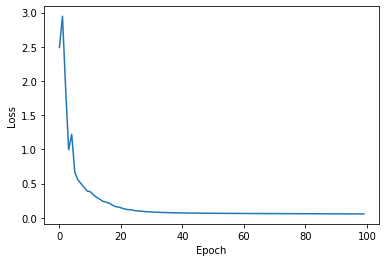

In [71]:
# Write Code !!

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 학습을 통해서 Loss를 감소시켰다면 이제는Test를 해봅니다.
    테스트 할때는 학습의 의미가 없기때문에 Gradient Descent를 사용하지 않도록 합니다.
    그 결과로 컴퓨터 Performance를 높이는 결과를 가져옵니다.
    이때 우리가 테스트하는 데이타는 이미지가 아니고 단순 숫자 값으로 입력된다는 점을 잘 고려해야합니다.
    출력된 값 중에서 가장 높은 값의 인덱스가 바로 target의 라벨이 됩니다.
    
    예측한 값과 정답을 일일이 비교해서 출력하고
    총 30개의 Test 데이타 중에서 정확하게 맞춘 갯수를 최종적으로 출력합니다.

In [75]:
 # Write Code!!
with torch.no_grad():
    outputs = model(X_test)
    _,predicted = torch.max(outputs, 1)
    correct = (y_test == predicted).sum().item()

print('================예측값, 정답 출력===================')
for i in range(y_test.shape[0]):
    print(f'{i+1}) {predicted[i]} , {y_test[i]}')
print(f'{y_test.shape[0]}개의 Test 데이타 중에서 정답을 맞춘 갯수는 {correct} 개 입니다!!')

================예측값, 정답 출력===================
1) 2 , 2
2) 1 , 1
3) 2 , 2
4) 0 , 0
5) 2 , 2
6) 1 , 1
7) 1 , 1
8) 1 , 1
9) 2 , 2
10) 2 , 2
11) 2 , 2
12) 1 , 1
13) 1 , 1
14) 2 , 2
15) 0 , 0
16) 0 , 0
17) 1 , 1
18) 2 , 2
19) 0 , 0
20) 0 , 0
21) 0 , 0
22) 0 , 0
23) 0 , 0
24) 2 , 2
25) 1 , 1
26) 2 , 2
27) 0 , 0
28) 0 , 0
29) 0 , 0
30) 1 , 1
30개의 Test 데이타 중에서 정답을 맞춘 갯수는 30 개 입니다!!
